In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from custom_models.dcgan import DCGANDiscriminator, DCGANGenerator, weights_init
import torch
import torch.nn as nn
from utils import load_medMNIST_data
import seaborn as sns
sns.set(style="whitegrid", context="notebook",)

In [3]:
dataloader, dataset = load_medMNIST_data()

MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/
Using downloaded and verified file: C:\Users\josem\.medmnist\bloodmnist.npz
Using downloaded and verified file: C:\Users\josem\.medmnist\bloodmnist.npz
Using downloaded and verified file: C:\Users\josem\.medmnist\bloodmnist.npz
Image size: torch.Size([3, 28, 28])
Label size: torch.Size([1])
Label values: {0, 1, 2, 3, 4, 5, 6, 7}


In [4]:
# get image size from the dataset
channels, dim_1, dim_2 = dataloader.dataset[0][0].shape

print(f"Channels: {channels}")
print(f"Dim 1: {dim_1}")
print(f"Dim 2: {dim_2}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Channels: 3
Dim 1: 28
Dim 2: 28


In [5]:
# ********** Training parameters **********
loss_fn = nn.BCEWithLogitsLoss()
optimizer_class = torch.optim.Adam
D_lr = 0.001
G_lr = 0.001

z_dimension = 128

# ********** Discriminator **********
discriminator = DCGANDiscriminator(inputChannels=channels).to(device)
discriminator.apply(weights_init)
optimizerD = torch.optim.Adam(discriminator.parameters(), lr=D_lr, betas=(0.5, 0.999))

# ********** Generator **********
generator = DCGANGenerator(inputDim=z_dimension, outputChannels=channels).to(device)
generator.apply(weights_init)
optimizerG = torch.optim.Adam(generator.parameters(), lr=G_lr, betas=(0.5, 0.999))


In [6]:
# Shape verification test
def test_shapes():
    z = torch.randn(128, z_dimension, 1, 1).to(device)
    img = torch.randn(128, channels, dim_1, dim_2).to(device)
    
    # Test generator
    gen_out = generator(z)
    print(f"Generator output: {gen_out.shape} (should be [128, {channels}, {dim_1}, {dim_2}]")
    
    # Test discriminator
    disc_out = discriminator(img)
    print(f"Discriminator output: {disc_out.shape} (should be [128])")
    
test_shapes()

Generator output: torch.Size([128, 3, 28, 28]) (should be [128, 3, 28, 28]
Discriminator output: torch.Size([128]) (should be [128])


Starting Training Loop...
Data range: min=-0.9921568632125854, max=1.0
[0/40][0/134] Loss_D: 0.6985 Loss_G: 0.6906
[0/40][70/134] Loss_D: 0.6302 Loss_G: 0.8731
Epoch 0 generated images:


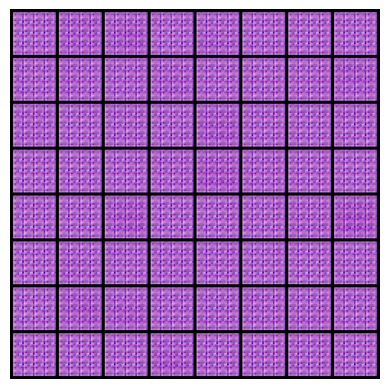

[1/40][0/134] Loss_D: 0.4779 Loss_G: 1.0942
[1/40][70/134] Loss_D: 0.3876 Loss_G: 1.4867
[2/40][0/134] Loss_D: 0.3702 Loss_G: 1.5279
[2/40][70/134] Loss_D: 0.7516 Loss_G: 1.1979
[3/40][0/134] Loss_D: 0.8060 Loss_G: 1.3674
[3/40][70/134] Loss_D: 0.7545 Loss_G: 0.7856
[4/40][0/134] Loss_D: 0.6911 Loss_G: 0.7418
[4/40][70/134] Loss_D: 0.7082 Loss_G: 0.7435
[5/40][0/134] Loss_D: 0.7025 Loss_G: 0.7251
[5/40][70/134] Loss_D: 0.6970 Loss_G: 0.6983
Epoch 5 generated images:


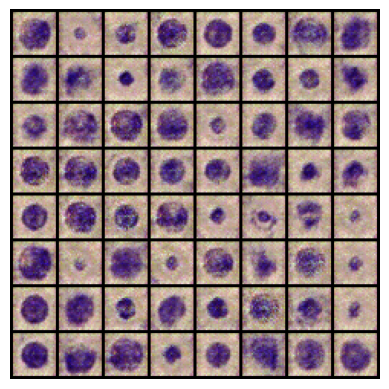

[6/40][0/134] Loss_D: 0.6920 Loss_G: 0.6921
[6/40][70/134] Loss_D: 0.6980 Loss_G: 0.7032
[7/40][0/134] Loss_D: 0.6968 Loss_G: 0.7013
[7/40][70/134] Loss_D: 0.6997 Loss_G: 0.6844
[8/40][0/134] Loss_D: 0.6906 Loss_G: 0.6924
[8/40][70/134] Loss_D: 0.6949 Loss_G: 0.7120
[9/40][0/134] Loss_D: 0.6916 Loss_G: 0.7135
[9/40][70/134] Loss_D: 0.6980 Loss_G: 0.6969
[10/40][0/134] Loss_D: 0.6927 Loss_G: 0.7152
[10/40][70/134] Loss_D: 0.6890 Loss_G: 0.7168
Epoch 10 generated images:


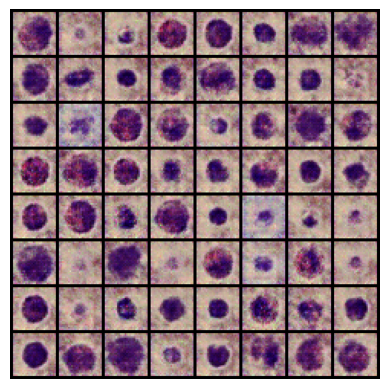

[11/40][0/134] Loss_D: 0.6905 Loss_G: 0.7050
[11/40][70/134] Loss_D: 0.6908 Loss_G: 0.7212
[12/40][0/134] Loss_D: 0.6971 Loss_G: 0.7011
[12/40][70/134] Loss_D: 0.6930 Loss_G: 0.6937
[13/40][0/134] Loss_D: 0.6932 Loss_G: 0.6996
[13/40][70/134] Loss_D: 0.6946 Loss_G: 0.6944
[14/40][0/134] Loss_D: 0.6990 Loss_G: 0.7179
[14/40][70/134] Loss_D: 0.6940 Loss_G: 0.7169
[15/40][0/134] Loss_D: 0.6949 Loss_G: 0.7058
[15/40][70/134] Loss_D: 0.6920 Loss_G: 0.6978
Epoch 15 generated images:


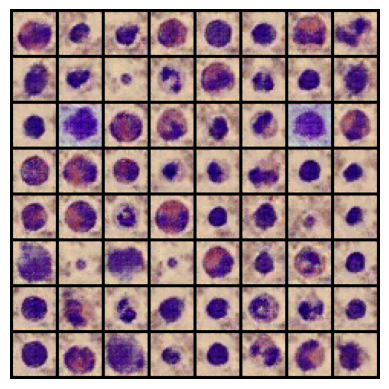

[16/40][0/134] Loss_D: 0.6950 Loss_G: 0.7027
[16/40][70/134] Loss_D: 0.6957 Loss_G: 0.7112
[17/40][0/134] Loss_D: 0.6950 Loss_G: 0.6751
[17/40][70/134] Loss_D: 0.6987 Loss_G: 0.6649
[18/40][0/134] Loss_D: 0.6916 Loss_G: 0.7019
[18/40][70/134] Loss_D: 0.6937 Loss_G: 0.6838
[19/40][0/134] Loss_D: 0.6957 Loss_G: 0.7292
[19/40][70/134] Loss_D: 0.6937 Loss_G: 0.6813
[20/40][0/134] Loss_D: 0.6886 Loss_G: 0.6929
[20/40][70/134] Loss_D: 0.7000 Loss_G: 0.7135
Epoch 20 generated images:


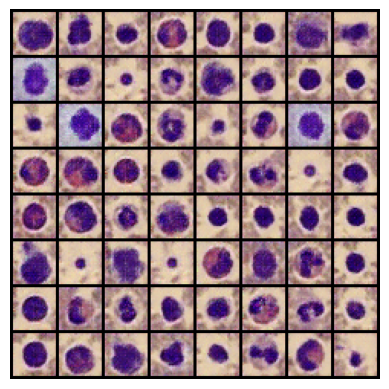

[21/40][0/134] Loss_D: 0.6938 Loss_G: 0.6807
[21/40][70/134] Loss_D: 0.6960 Loss_G: 0.7086
[22/40][0/134] Loss_D: 0.6924 Loss_G: 0.7175
[22/40][70/134] Loss_D: 0.7031 Loss_G: 0.6890
[23/40][0/134] Loss_D: 0.6932 Loss_G: 0.7033
[23/40][70/134] Loss_D: 0.6844 Loss_G: 0.7040
[24/40][0/134] Loss_D: 0.6921 Loss_G: 0.7130
[24/40][70/134] Loss_D: 0.6906 Loss_G: 0.7009
[25/40][0/134] Loss_D: 0.6897 Loss_G: 0.6892
[25/40][70/134] Loss_D: 0.6919 Loss_G: 0.6970
Epoch 25 generated images:


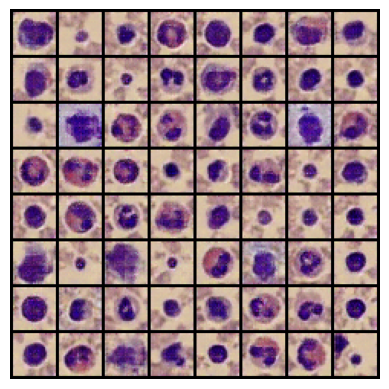

[26/40][0/134] Loss_D: 0.6949 Loss_G: 0.7122
[26/40][70/134] Loss_D: 0.6930 Loss_G: 0.7089
[27/40][0/134] Loss_D: 0.6922 Loss_G: 0.7249
[27/40][70/134] Loss_D: 0.7015 Loss_G: 0.6887
[28/40][0/134] Loss_D: 0.6954 Loss_G: 0.7315
[28/40][70/134] Loss_D: 0.6909 Loss_G: 0.7031
[29/40][0/134] Loss_D: 0.6916 Loss_G: 0.7106
[29/40][70/134] Loss_D: 0.6884 Loss_G: 0.6950
[30/40][0/134] Loss_D: 0.6883 Loss_G: 0.7266
[30/40][70/134] Loss_D: 0.6885 Loss_G: 0.6838
Epoch 30 generated images:


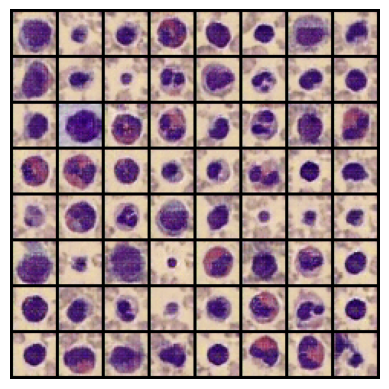

[31/40][0/134] Loss_D: 0.6913 Loss_G: 0.6870
[31/40][70/134] Loss_D: 0.6989 Loss_G: 0.6482
[32/40][0/134] Loss_D: 0.6946 Loss_G: 0.6721
[32/40][70/134] Loss_D: 0.6883 Loss_G: 0.7217
[33/40][0/134] Loss_D: 0.6887 Loss_G: 0.6917
[33/40][70/134] Loss_D: 0.6947 Loss_G: 0.7745
[34/40][0/134] Loss_D: 0.6865 Loss_G: 0.6573
[34/40][70/134] Loss_D: 0.6857 Loss_G: 0.7199
[35/40][0/134] Loss_D: 0.6903 Loss_G: 0.7251
[35/40][70/134] Loss_D: 0.6788 Loss_G: 0.7176
Epoch 35 generated images:


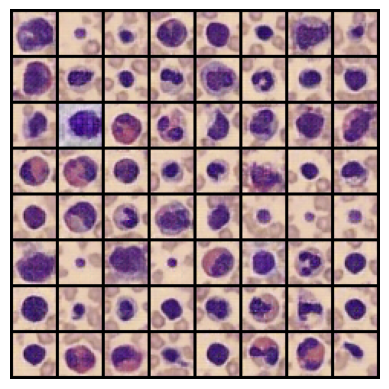

[36/40][0/134] Loss_D: 0.6792 Loss_G: 0.7678
[36/40][70/134] Loss_D: 0.6834 Loss_G: 0.7639
[37/40][0/134] Loss_D: 0.6823 Loss_G: 0.7633
[37/40][70/134] Loss_D: 0.6754 Loss_G: 0.7609
[38/40][0/134] Loss_D: 0.6788 Loss_G: 0.7462
[38/40][70/134] Loss_D: 0.7104 Loss_G: 0.6384
[39/40][0/134] Loss_D: 0.6336 Loss_G: 0.8236
[39/40][70/134] Loss_D: 0.6434 Loss_G: 0.7479
Training Complete!


In [7]:
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.utils as vutils

# Training parameters
num_epochs = 40
batch_size = 128
nz = z_dimension  # Size of latent vector

# Training parameters
real_label = 1  # Soft label for real images
smoothing = 0.1  # Smoothing factor 
fake_label = 0  # Soft label for fake images
# Use 64 for consistent visualization
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Lists to track progress
G_losses = []
D_losses = []
img_list = []


def gradient_penalty(discriminator, real_samples, fake_samples, device):
    batch_size = real_samples.size(0)
    alpha = torch.rand(batch_size, 1, 1, 1).to(device)
    interpolates = alpha * real_samples + (1 - alpha) * fake_samples
    interpolates.requires_grad_(True)

    d_interpolates = discriminator(interpolates)
    gradients = torch.autograd.grad(d_interpolates, interpolates,
                                    grad_outputs=torch.ones_like(
                                        d_interpolates),
                                    create_graph=True, retain_graph=True)[0]

    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty


print("Starting Training Loop...")
# Updated training loop with stabilization techniques

# Add before training loop
sample, _ = next(iter(dataloader))
print(f"Data range: min={sample.min().item()}, max={sample.max().item()}")

for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        ############################
        # (1) Update Discriminator
        ############################
        discriminator.zero_grad()

        # Prepare real images
        real_images = data[0].to(device)
        real_images = real_images * 2.0 - 1.0
        batch_size = real_images.size(0)

        # Train with real images
        real_labels = torch.full((batch_size,), real_label - smoothing, device=device, dtype=torch.float)
        output_real = discriminator(real_images)
        errD_real = loss_fn(output_real, real_labels)
        errD_real.backward()

        # Train with fake images - CREATE NEW NOISE AND FAKE IMAGES
        noise_d = torch.randn(batch_size, nz, 1, 1, device=device)
        fake_images_d = generator(noise_d)
        fake_labels = torch.full((batch_size,), fake_label + smoothing, device=device, dtype=torch.float)
        output_fake = discriminator(fake_images_d.detach())
        errD_fake = loss_fn(output_fake, fake_labels)
        errD_fake.backward()

        # Gradient penalty with the same fake images
        errD = (errD_real + errD_fake) / 2
        optimizerD.step()

        ############################
        # (2) Update Generator
        ############################
        for _ in range(3):
            generator.zero_grad()
            
            # CREATE FRESH NOISE AND FAKE IMAGES FOR GENERATOR
            noise_g = torch.randn(batch_size, nz, 1, 1, device=device)
            fake_images_g = generator(noise_g)
            
            output = discriminator(fake_images_g)
            real_labels = torch.full((batch_size,), real_label, device=device, dtype=torch.float)
            errG = loss_fn(output, real_labels)
            errG.backward()
            optimizerG.step()

        # Store losses
        G_losses.append(errG.item())
        D_losses.append(errD.item() if isinstance(
                errD, torch.Tensor) else errD)

        # Print stats
        if i % 70 == 0:
            print(f'[{epoch}/{num_epochs}][{i}/{len(dataloader)}] '
                  f'Loss_D: {errD.item() if isinstance(errD, torch.Tensor) else errD:.4f} Loss_G: {errG.item():.4f}')

    # Generate and store images
    with torch.no_grad():
        fake_images = generator(fixed_noise)
        img_list.append(vutils.make_grid(
            fake_images, padding=2, normalize=True))

    # plot sample images
    if epoch % 5 == 0:
        print(f'Epoch {epoch} generated images:')
        plt.imshow(img_list[-1].cpu().numpy().transpose((1, 2, 0)))
        plt.axis('off')
        plt.show()

print("Training Complete!")

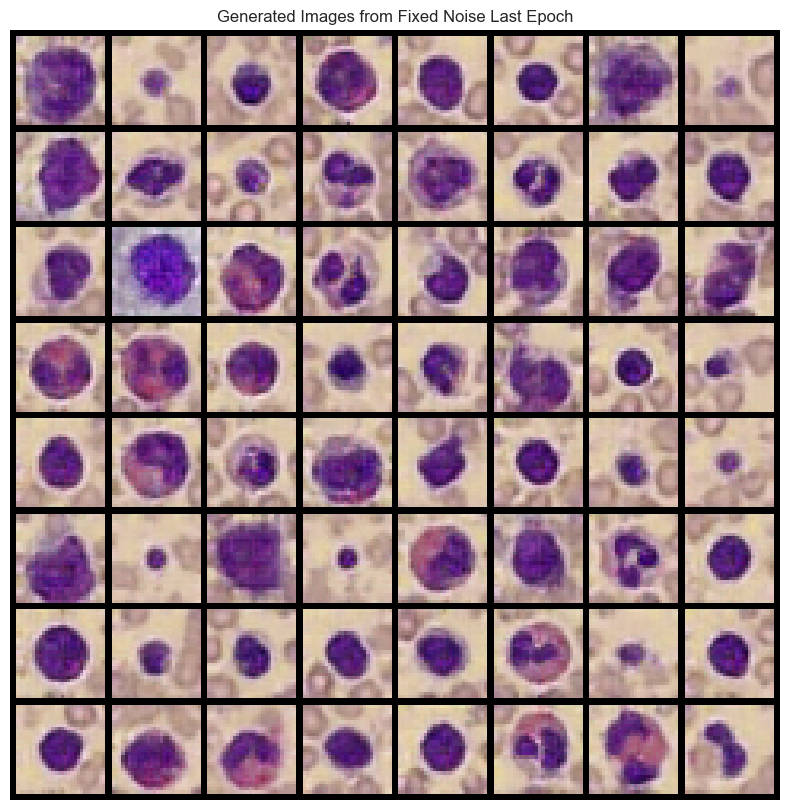

In [8]:
# plot from fixed noise
import matplotlib.pyplot as plt

output_images = generator(fixed_noise).detach().cpu()
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.title("Generated Images from Fixed Noise Last Epoch")
plt.imshow(vutils.make_grid(output_images, padding=2, normalize=True).permute(1, 2, 0))
plt.show()

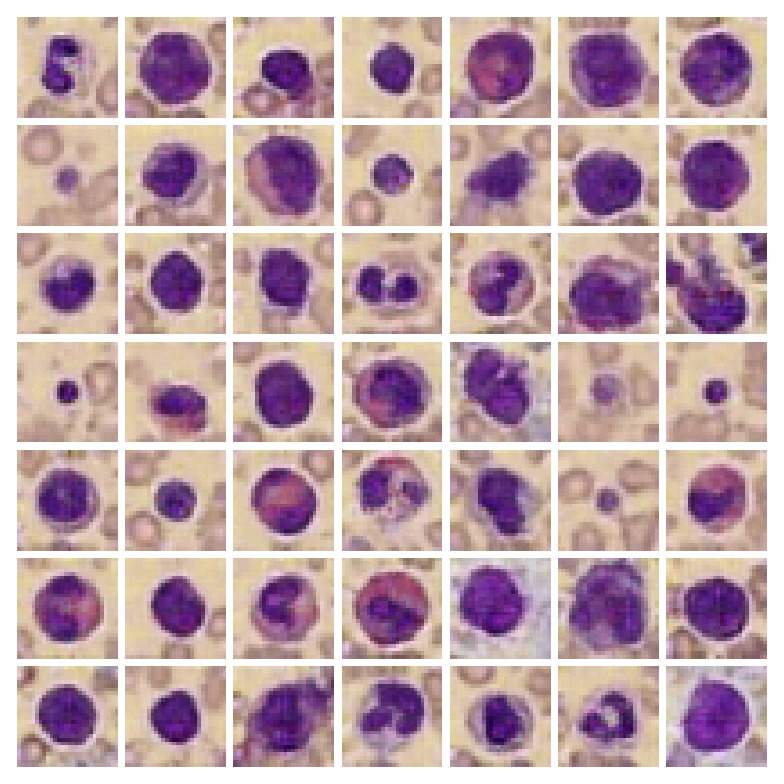

In [9]:
# display generated images
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# Function to display generated images
def show_generated_images(generator, nz, num_images=49, device=device):
    # Generate fresh images
    with torch.no_grad():
        # Create batch of latent vectors
        noise = torch.randn(num_images, nz, 1, 1, device=device)
        # Generate fake images
        fake_images = generator(noise)
    
    # Create a grid with WHITE padding (pad_value=1.0)
    grid = vutils.make_grid(fake_images, nrow=7, padding=2, normalize=True, pad_value=1.0)
    
    # Display the image
    plt.figure(figsize=(8,8))
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.axis('off')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Show exactly 25 newly generated images with white padding
show_generated_images(generator, nz=z_dimension)

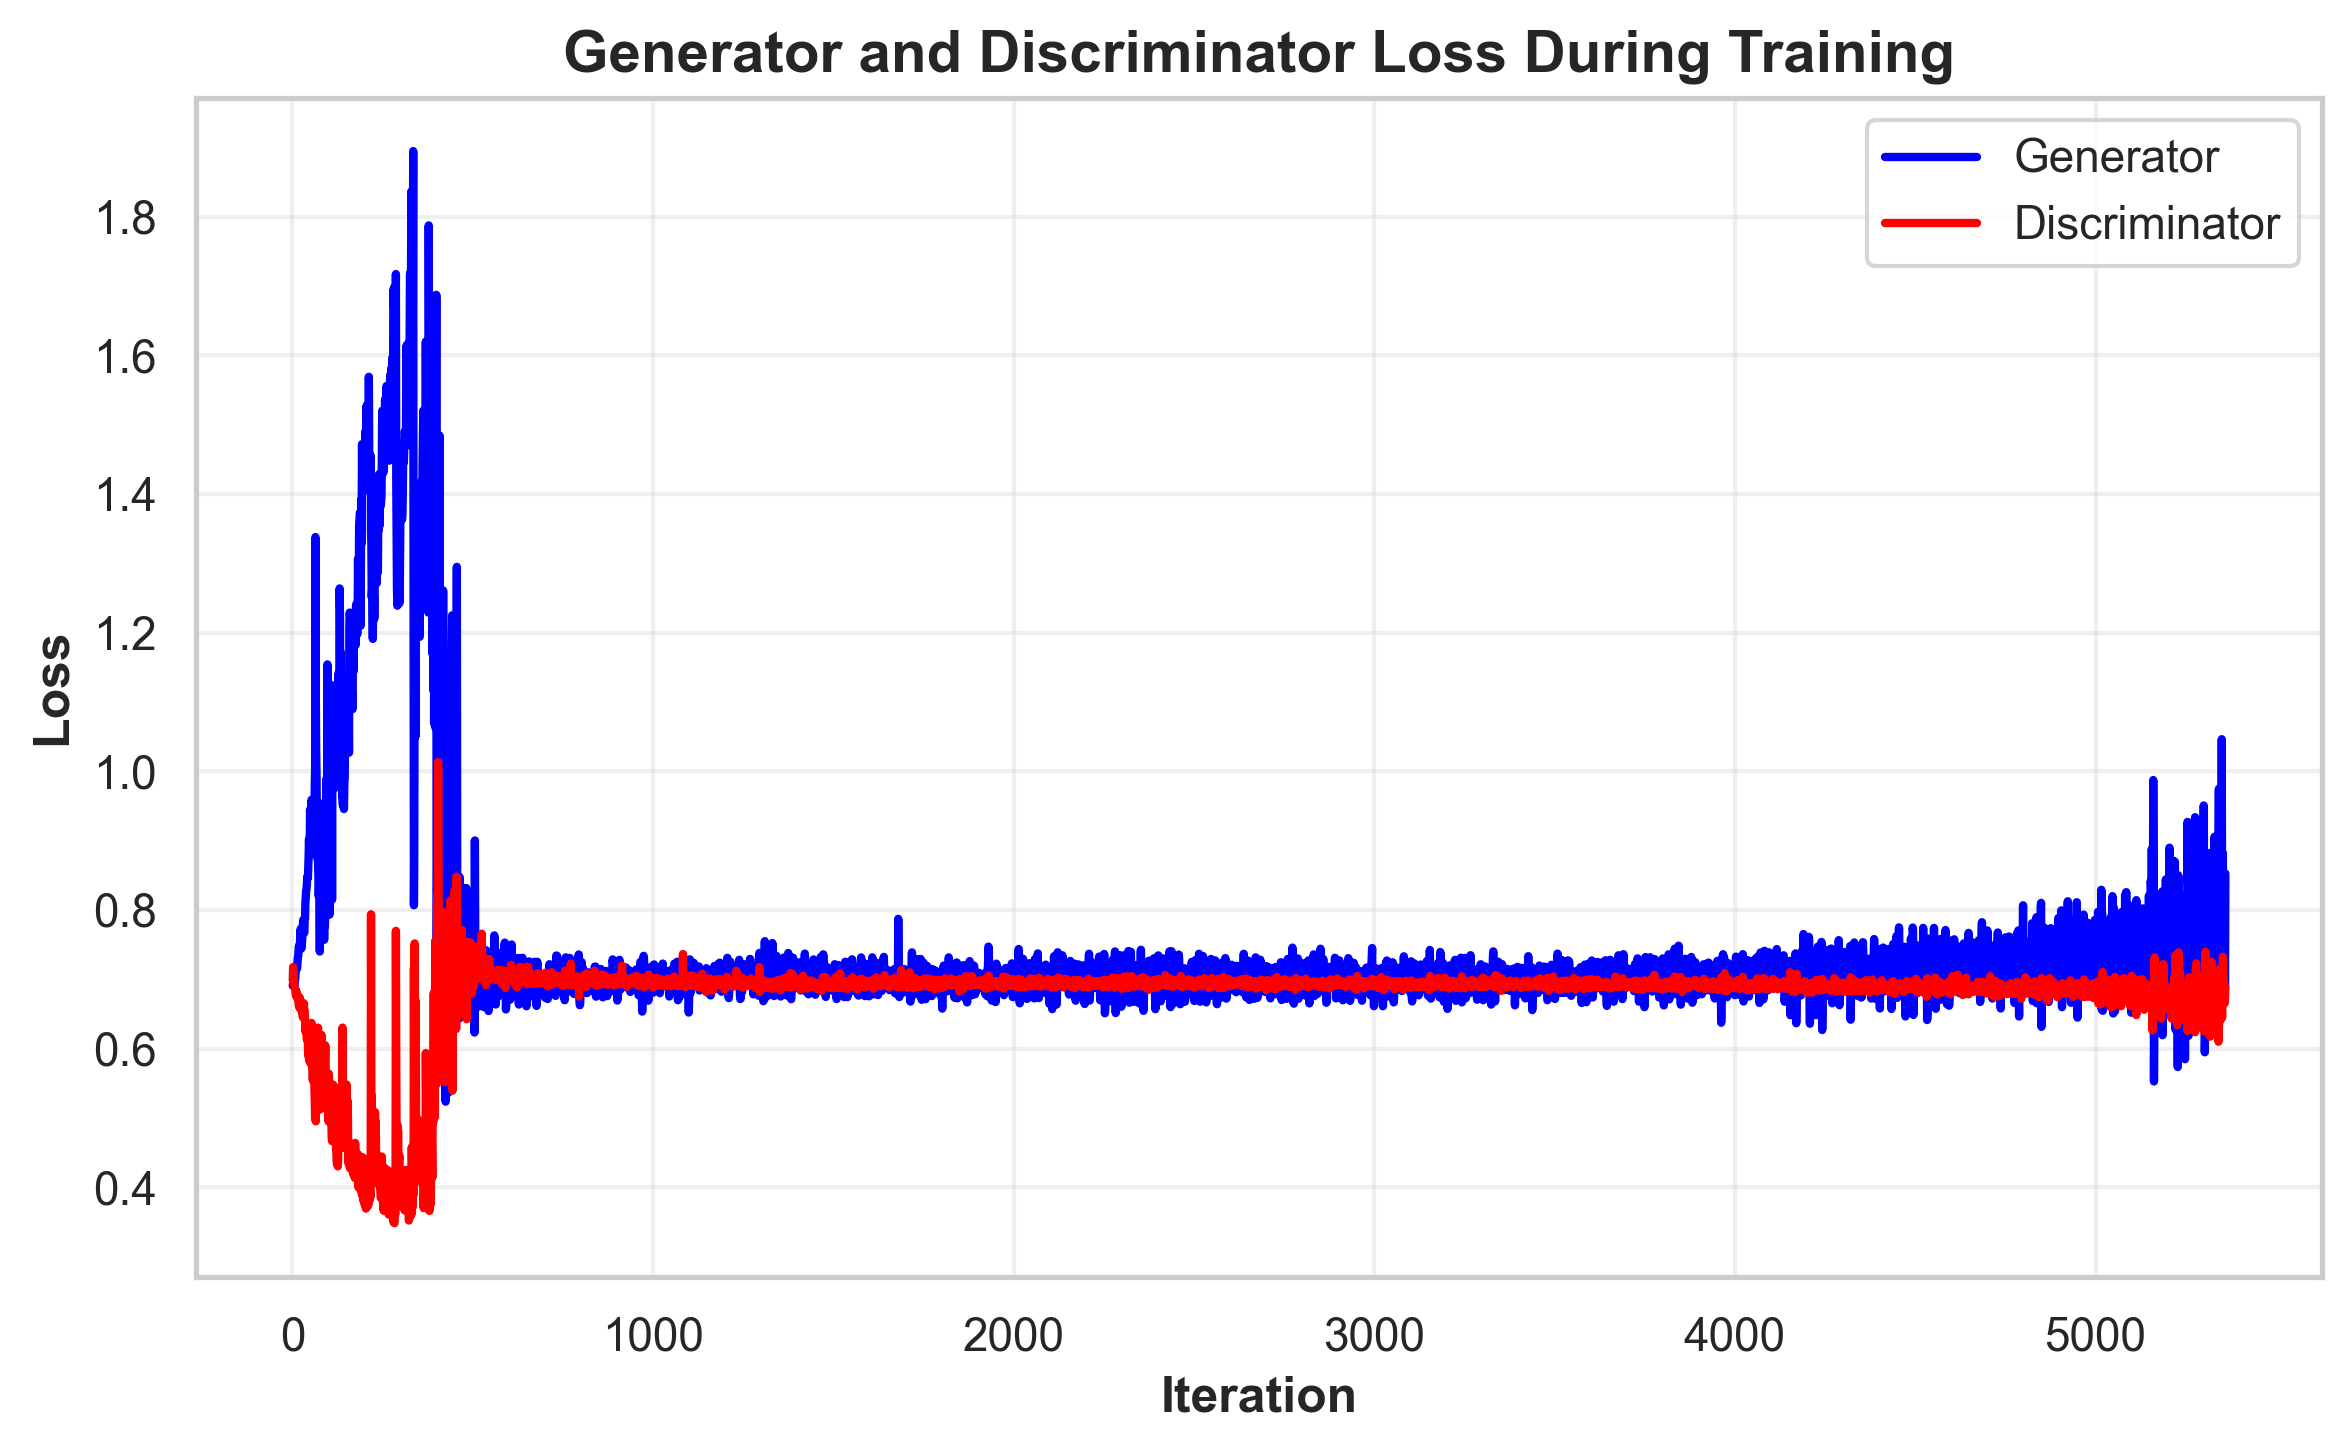

In [10]:
#plot the loss curves
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Function to plot loss curves with enhanced styling
def plot_loss_curves(G_losses, D_losses):
    # Set the aesthetic style
    sns.set(style="whitegrid", context="notebook")
    
    # Format the loss data
    iterations = np.arange(1, len(G_losses) + 1)
    loss_df = pd.DataFrame({
        'Iteration': iterations,
        'Generator': G_losses,
        'Discriminator': D_losses
    })
    
    plt.figure(figsize=(8, 5), dpi=300)
    
    ax = sns.lineplot(
        data=loss_df,
        x='Iteration',
        y='Generator',
        label='Generator',
        color='blue',
        linewidth=2,
    )
    
    sns.lineplot(
        data=loss_df,
        x='Iteration',
        y='Discriminator',
        label='Discriminator',
        color='red',
        linewidth=2,
    )
    
    plt.title("Generator and Discriminator Loss During Training", fontweight="bold", fontsize=14)
    plt.xlabel("Iteration", fontweight="bold")
    plt.ylabel("Loss", fontweight="bold")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    plt.show()

# Call the function with your loss data
plot_loss_curves(G_losses, D_losses)

In [11]:
from torch.utils.data import DataLoader, RandomSampler, ConcatDataset
# **************************************
# Wrapper to use pytorch_fid's fid_score() with in-memory images
import pytorch_fid_wrapper as pfw

N_EVAL_SAMPLES = 10000

# Generate samples from the generator
def generate_samples(generator, num_samples=N_EVAL_SAMPLES, z_dim=64):
    generator.eval()  # Set to evaluation mode
    with torch.no_grad():
        noise = torch.randn(num_samples, z_dim, 1, 1).to(device)
        generated_images = generator(noise)
    return generated_images

def get_fid(synthetic_samples):
    random_sampler = RandomSampler(
                dataloader, num_samples=N_EVAL_SAMPLES)

    eval_dataloader = DataLoader(
                dataset=dataset, batch_size=128, sampler=random_sampler)
    eval_tensor = torch.cat(
                [batch[0] for batch in eval_dataloader], dim=0)


    # 4. Compute Frechet Inception Distance (FID) between real and synthetic
    pfw.set_config(batch_size=10, dims=2048, device="cuda" if torch.cuda.is_available() else "cpu")
    # print(f"Real samples shape: {eval_tensor.shape}")
    # print(f"Fake samples shape: {synthetic_samples.shape}"
    fid = pfw.fid(fake_images=synthetic_samples,
                real_images=eval_tensor)
    print(f"FID:{fid}")
    
    return fid


In [ ]:
import random

import numpy as np


EVAL_SEEDS = [100, 200, 300, 400, 500]


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    torch.use_deterministic_algorithms(True)
    
    
fid_scores = []

for seed in EVAL_SEEDS:
    set_seed(seed)   
    synthetic_samples = generate_samples(generator, num_samples=N_EVAL_SAMPLES, z_dim=z_dimension) 
    fid_score = get_fid(synthetic_samples)
    print(f"FID score for seed {seed}: {fid_score}")
    fid_scores.append(fid_score)
    
    

c:\Users\josem\anaconda3\envs\cuda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\josem\anaconda3\envs\cuda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


FID:177.1753600933858
FID score for seed 100: 177.1753600933858
FID:177.9589830794771
FID score for seed 200: 177.9589830794771


In [ ]:
# Calculate the average FID score
average_fid = np.mean(fid_scores)
std_fid = np.std(fid_scores)
print(f"FID scores: {fid_scores}")
print(f"Average FID score: {average_fid:.4f} ± {std_fid:.4f} (over {len(EVAL_SEEDS)} seeds)")

FID scores: [167.4616972771654, 165.80903382413968, 166.80125119769997, 167.16874525528195, 167.00341652958326]
Average FID score: 166.8488 ± 0.5631 (over 5 seeds)
